In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
import loaddata
base_df = loaddata.processedData
base_df.shape

(921, 29)

In [3]:
df = base_df.copy()

In [4]:
df.groupby(['heart_disease','num'])['num','ca','thal'].count()

num   ca  thal
heart_disease num                
0             0    411  166   187
1             1    196   58    99
              2    135   36    67
              3    135   37    63
              4     43   13    18

In [5]:
df.count(numeric_only=True)

age                        920
sex                        920
cp                         920
trestbps                   861
chol                       718
fbs                        830
restecg                    918
thalach                    865
exang                      865
oldpeak                    858
slope                      611
ca                         310
thal                       434
num                        920
cleaveland                 921
hungarian                  921
switzerland                921
va                         921
pain                       921
restecg_normal             921
restecg_sttabnormal        921
restecg_venthypertrophy    921
slope_upsloping            921
slope_flat                 921
slope_downsloping          921
thal_normal                921
thal_fixed                 921
thal_reversible            921
heart_disease              921
dtype: int64

In [6]:
df['target'] = df['heart_disease']
df.drop(['heart_disease','num'],axis=1,inplace=True)

#df.drop('ca',inplace=True)
#df.drop('thal',inplace=True)
df['ca'].fillna(value=0, inplace=True)
df['thal'].fillna(value=0, inplace=True)

print df.shape

(921, 28)


In [7]:
df.dropna(inplace=True)
y = df['target']
x = df.drop(['target'],axis=1)
print 'x: ' +str(x.shape)
print 'y: ' +str(y.shape)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

print 'xTrain: ' +str(xTrain.shape)
print 'xTest: ' +str(xTest.shape)
print 'yTrain: ' +str(yTrain.shape)
print 'yTest: ' +str(yTest.shape)


x: (462, 27)
y: (462,)
xTrain: (309, 27)
xTest: (153, 27)
yTrain: (309,)
yTest: (153,)


In [8]:
model = LogisticRegression()
model.fit(xTrain,yTrain)
LRAccuracy = accuracy_score(yTest,model.predict(xTest))
print LRAccuracy

0.830065359477


In [9]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'cleaveland',
       'hungarian', 'switzerland', 'va', 'pain', 'restecg_normal',
       'restecg_sttabnormal', 'restecg_venthypertrophy', 'slope_upsloping',
       'slope_flat', 'slope_downsloping', 'thal_normal', 'thal_fixed',
       'thal_reversible', 'target'], dtype=object)

problem with fbs

In [10]:
plot_df=df[['target','thal','sex','exang','slope','oldpeak','cp']].copy()
#import numpy as np
#df['chol'] = df.apply(lambda x: x.chol if x.chol > 0 else np.nan, axis=1)
#df.dropna(inplace=True)



/Users/nwb066/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


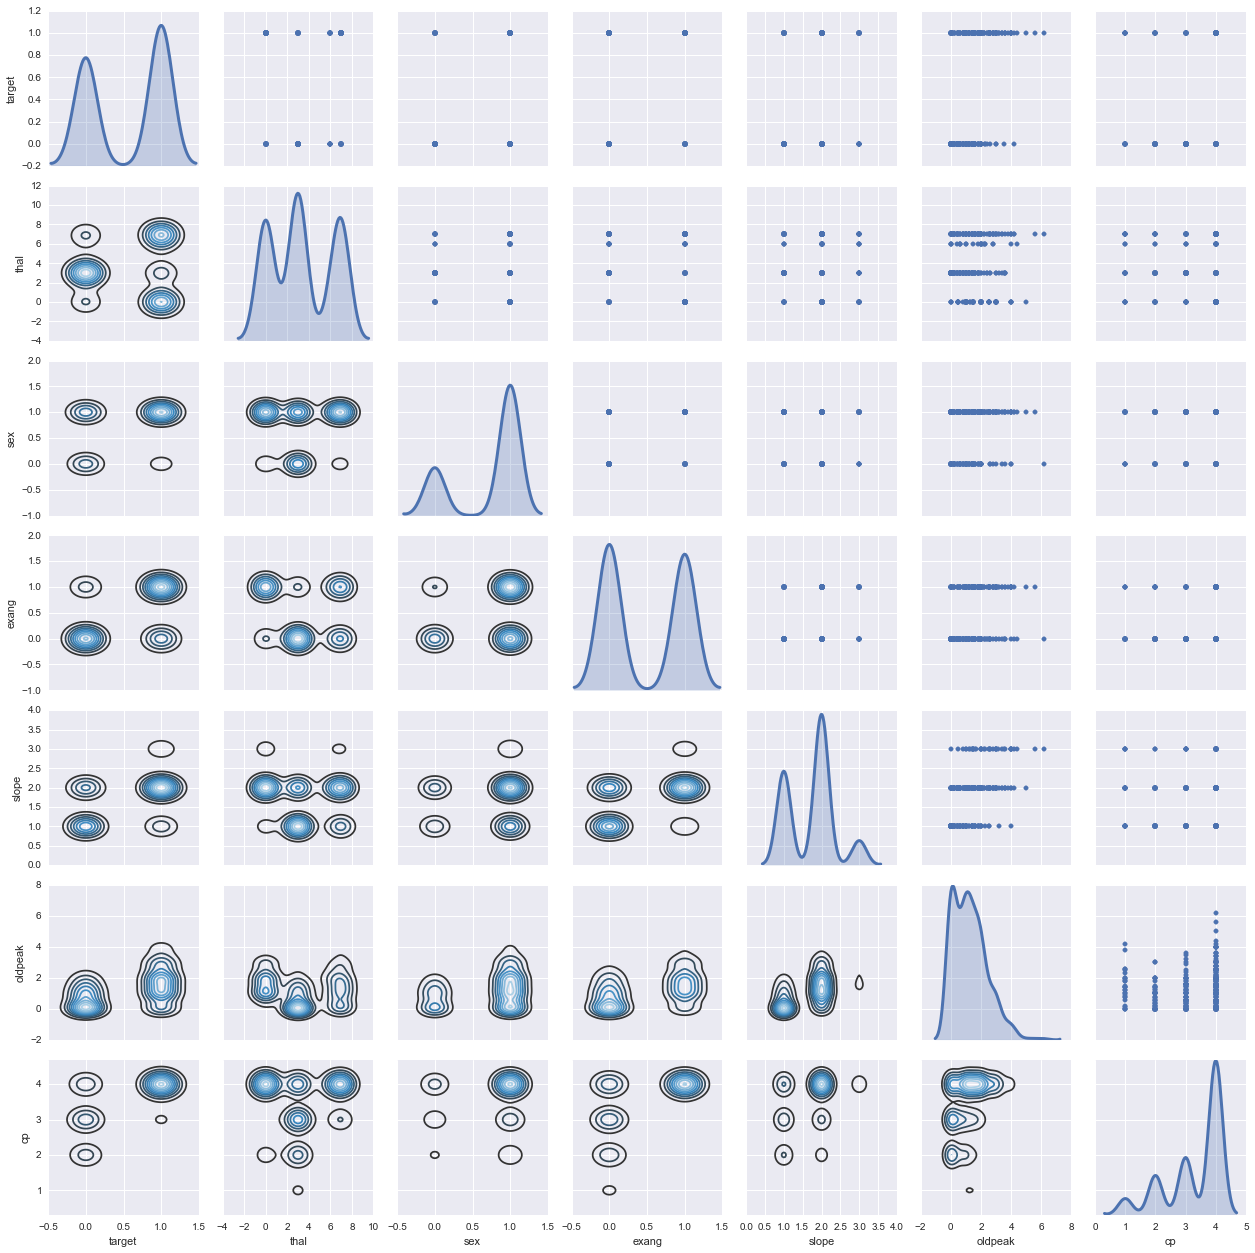

In [11]:
g = seaborn.PairGrid(plot_df, diag_sharey=False)
g.map_lower(seaborn.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(seaborn.kdeplot, lw=3, shade=True)

In [12]:


model_df = df[['target','thal','slope','exang','oldpeak','cp']].copy()

y = model_df['target']
x = model_df.drop(['target'],axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)



model = LogisticRegression()
model.fit(xTrain,yTrain)
LRAccuracy = accuracy_score(yTest,model.predict(xTest))
print LRAccuracy




0.81045751634


In [16]:

range(1,len(['a','b'])+1)

[1, 2]